Baseline Model (Without Regularization)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8772 - loss: 0.4348 - val_accuracy: 0.9581 - val_loss: 0.1433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9622 - loss: 0.1247 - val_accuracy: 0.9688 - val_loss: 0.1106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9764 - loss: 0.0819 - val_accuracy: 0.9734 - val_loss: 0.0878
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9751 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0441 - val_accuracy: 0.9779 - val_loss: 0.0808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9738 - val_loss: 0.0851
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9765 - val_loss: 0.0808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.02

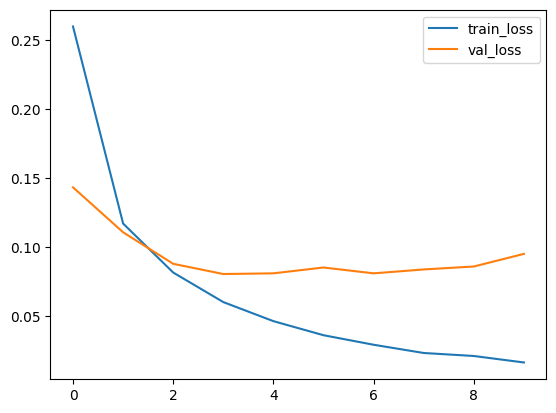

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the baseline model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot accuracy and loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


L1 REGULARIZATION

In [2]:
from tensorflow.keras.regularizers import l1

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7689 - loss: 4.9582 - val_accuracy: 0.8594 - val_loss: 1.1622
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8497 - loss: 1.1593 - val_accuracy: 0.8662 - val_loss: 1.0422
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8589 - loss: 1.0585 - val_accuracy: 0.8697 - val_loss: 0.9866
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8671 - loss: 1.0012 - val_accuracy: 0.8704 - val_loss: 0.9447
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8676 - loss: 0.9743 - val_accuracy: 0.8834 - val_loss: 0.9252
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8713 - loss: 0.9554 - val_accuracy: 0.8767 - val_loss: 0.9089
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8727 - loss: 0.9342 - val_accuracy: 0.8807 - val_loss: 0.9001
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8774 - loss: 0.9095 

L2 REGULARIZATION

In [3]:
from tensorflow.keras.regularizers import l2

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8628 - loss: 0.9560 - val_accuracy: 0.9289 - val_loss: 0.3958
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9268 - loss: 0.4076 - val_accuracy: 0.9418 - val_loss: 0.3438
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9365 - loss: 0.3637 - val_accuracy: 0.9460 - val_loss: 0.3231
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9404 - loss: 0.3437 - val_accuracy: 0.9416 - val_loss: 0.3111
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9445 - loss: 0.3232 - val_accuracy: 0.9521 - val_loss: 0.2909
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9488 - loss: 0.3058 - val_accuracy: 0.9491 - val_loss: 0.2999
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9495 - loss: 0.2946 - val_accuracy: 0.9591 - val_loss: 0.2730
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9510 - loss: 0.2901

In [4]:
from tensorflow.keras.regularizers import l1_l2

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7651 - loss: 5.1391 - val_accuracy: 0.8590 - val_loss: 1.1968
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8452 - loss: 1.2095 - val_accuracy: 0.8428 - val_loss: 1.1427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8597 - loss: 1.0844 - val_accuracy: 0.8608 - val_loss: 1.0226
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8646 - loss: 1.0193 - val_accuracy: 0.8702 - val_loss: 0.9552
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8695 - loss: 0.9836 - val_accuracy: 0.8785 - val_loss: 0.9126
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8676 - loss: 0.9555 - val_accuracy: 0.8770 - val_loss: 0.9198
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8732 - loss: 0.9398 - val_accuracy: 0.8811 - val_loss: 0.9116
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8728 - loss: 0.9311 

DDROPOUT REGULARIZATION

In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8127 - loss: 0.6114 - val_accuracy: 0.9508 - val_loss: 0.1640
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9320 - loss: 0.2311 - val_accuracy: 0.9626 - val_loss: 0.1277
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9436 - loss: 0.1886 - val_accuracy: 0.9700 - val_loss: 0.1005
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9506 - loss: 0.1656 - val_accuracy: 0.9730 - val_loss: 0.0933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9548 - loss: 0.1528 - val_accuracy: 0.9728 - val_loss: 0.0918
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9585 - loss: 0.1360 - val_accuracy: 0.9748 - val_loss: 0.0856
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9602 - loss: 0.1254 - val_accuracy: 0.9765 - val_loss: 0.0817
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9637 - loss: 0.1184 -

EARLY STOPING

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8729 - loss: 0.4381 - val_accuracy: 0.9596 - val_loss: 0.1330
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9644 - loss: 0.1207 - val_accuracy: 0.9683 - val_loss: 0.1008
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9779 - loss: 0.0756 - val_accuracy: 0.9723 - val_loss: 0.0865
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9836 - loss: 0.0566 - val_accuracy: 0.9742 - val_loss: 0.0814
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9872 - loss: 0.0418 - val_accuracy: 0.9764 - val_loss: 0.0771
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9898 - loss: 0.0351 - val_accuracy: 0.9789 - val_loss: 0.0690
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0286 - val_accuracy: 0.9763 - val_loss: 0.0768
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9946 - loss: 0.0193 

DATA AGUMANTATION

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Reshape x_train and x_test to have a channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Add channel dimension for grayscale
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)    # Add channel dimension for grayscale

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Update input shape
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
   9/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1399 - loss: 2.2821

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7334 - loss: 0.8634 - val_accuracy: 0.9557 - val_loss: 0.1629
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9278 - loss: 0.2515 - val_accuracy: 0.9667 - val_loss: 0.1138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9419 - loss: 0.2007 - val_accuracy: 0.9689 - val_loss: 0.1049
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9508 - loss: 0.1689 - val_accuracy: 0.9737 - val_loss: 0.0876
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9524 - loss: 0.1606 - val_accuracy: 0.9730 - val_loss: 0.0863
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9542 - loss: 0.1523 - val_accuracy: 0.9727 - val_loss: 0.0827
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9595 - loss: 0.1402 - val_accuracy: 0.9727 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9598 - loss: 0.13

In [9]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.5859 - loss: 1.8493 - val_accuracy: 0.9125 - val_loss: 0.6599
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.7528 - loss: 1.0670 - val_accuracy: 0.9305 - val_loss: 0.5860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.7800 - loss: 0.9793 - val_accuracy: 0.9292 - val_loss: 0.5610
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7861 - loss: 0.9512 - val_accuracy: 0.9385 - val_loss: 0.5222
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.7922 - loss: 0.9292 - val_accuracy: 0.9473 - val_loss: 0.5130
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7973 - loss: 0.9063 - val_accuracy: 0.9363 - val_loss: 0.5135
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7987 - loss: 0.9099 - val_accuracy: 0.9379 - val_loss: 0.4994
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8020 -